In [3]:
import pandas as pd
import numpy as np

# 1.Loading Data
np.random.seed(42)

dates = pd.date_range(start='2023-01-01', end='2023-12-31')

data = {
    'Date': np.random.choice(dates, 1000),
    'Product_ID': np.random.randint(1000, 1100, 1000),
    'Store_ID': np.random.randint(1, 11, 1000),
    'Sales_Amount': np.round(np.random.uniform(20.0, 200.0, 1000), 2),
    'Units_Sold': np.random.randint(1, 20, 1000)
}

sales_data = pd.DataFrame(data)

sales_data.head()


,Date,Product_ID,Store_ID,Sales_Amount,Units_Sold
0,2023-04-13,1002,7,76.22,10
1,2023-12-15,1032,5,135.68,18
2,2023-09-28,1005,7,55.25,18
3,2023-04-17,1049,3,181.45,3
4,2023-03-13,1009,2,113.63,15


In [4]:
#2.Data Cleaning
# Check for missing values
print(sales_data.isnull().sum())

# Check for duplicates
print(sales_data.duplicated().sum())

# Remove duplicates if any
sales_data.drop_duplicates(inplace=True)


Date            0
Product_ID      0
Store_ID        0
Sales_Amount    0
Units_Sold      0
dtype: int64
0


In [6]:
#3.Exploratory Data Analysis (EDA)
# Summary statistics
sales_data.describe()


,Product_ID,Store_ID,Sales_Amount,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1048.994000,5.496000,111.392310,10.450000
std,29.176553,2.834787,52.469125,5.356509
min,1000.000000,1.000000,20.030000,1.000000
25%,1024.000000,3.000000,65.292500,6.000000
50%,1048.000000,5.000000,114.690000,11.000000
75%,1074.000000,8.000000,156.722500,15.000000
max,1099.000000,10.000000,199.950000,19.000000


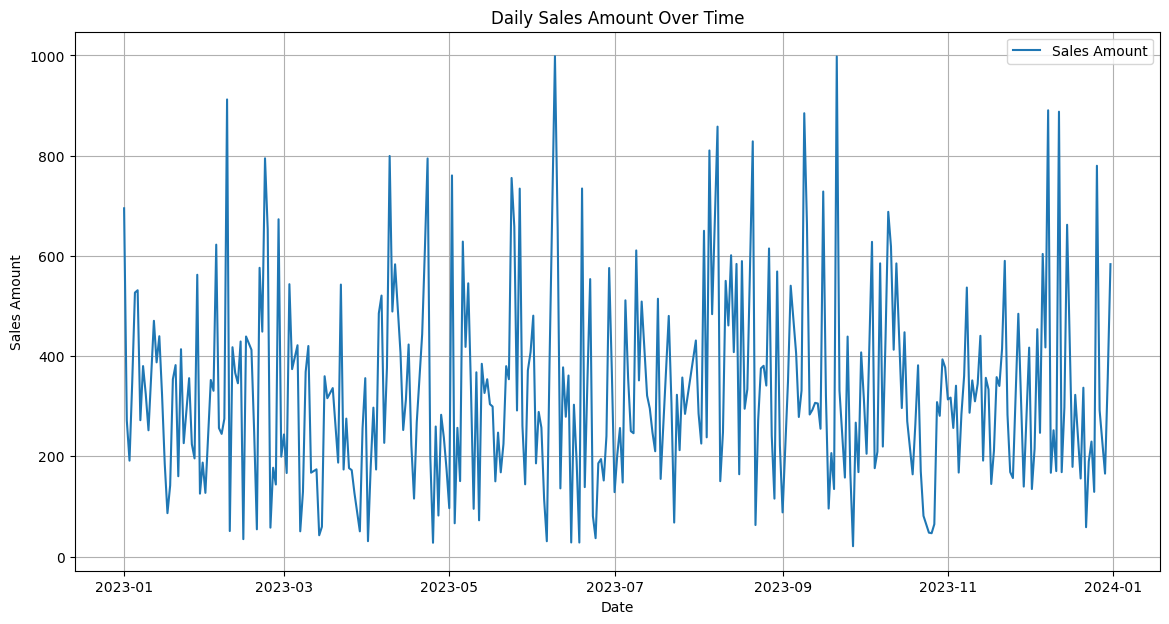

In [7]:
# SALES OVER TIME
daily_sales = sales_data.groupby('Date').agg({'Sales_Amount': 'sum', 'Units_Sold': 'sum'}).reset_index()

# Plotting daily sales
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales_Amount'], label='Sales Amount')
plt.title('Daily Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()


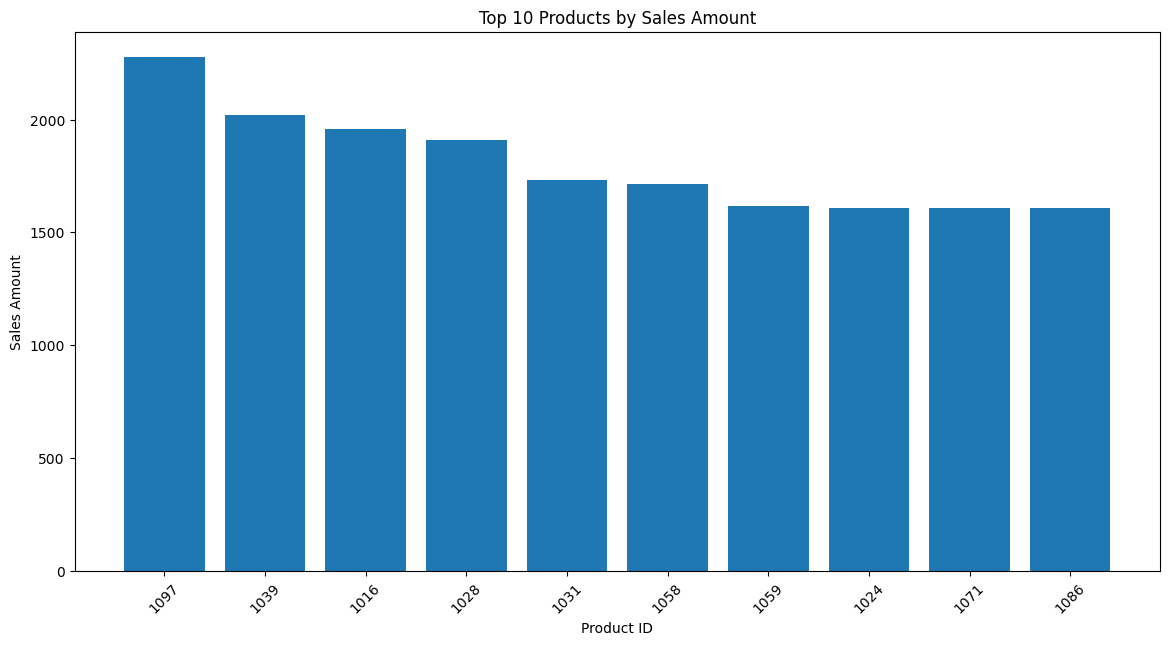

In [8]:
# Sales by Product
product_sales = sales_data.groupby('Product_ID').agg({'Sales_Amount': 'sum', 'Units_Sold': 'sum'}).reset_index()

# Top 10 Products by Sales Amount
top_products = product_sales.sort_values(by='Sales_Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
plt.bar(top_products['Product_ID'].astype(str), top_products['Sales_Amount'])
plt.title('Top 10 Products by Sales Amount')
plt.xlabel('Product ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


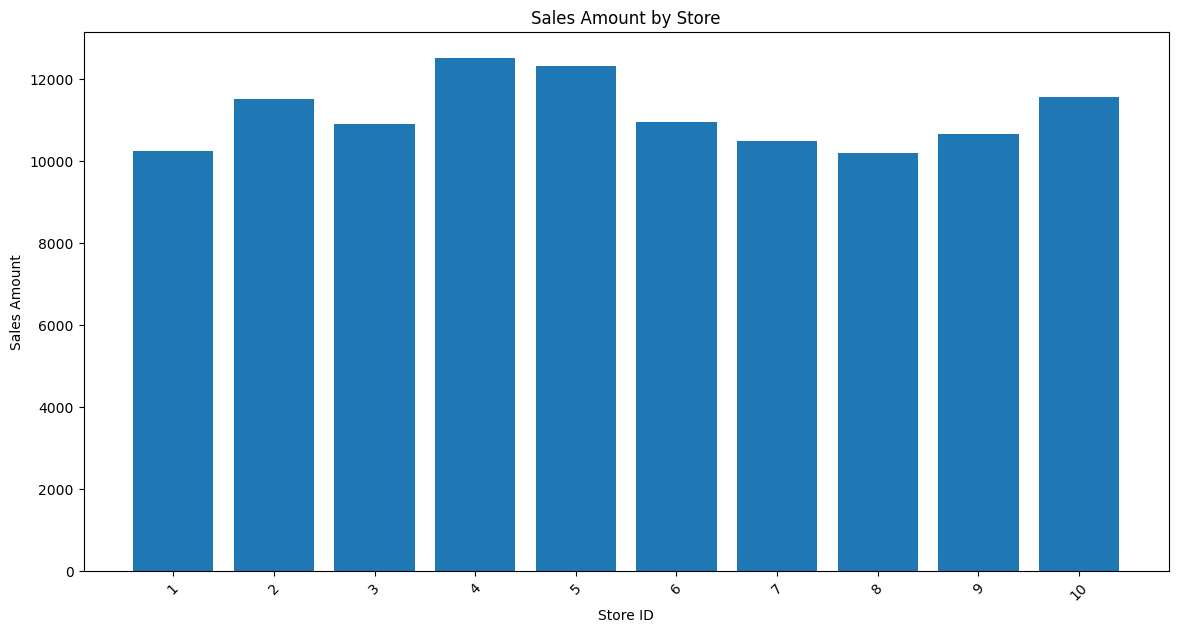

In [9]:
# Sales by Store
store_sales = sales_data.groupby('Store_ID').agg({'Sales_Amount': 'sum', 'Units_Sold': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))
plt.bar(store_sales['Store_ID'].astype(str), store_sales['Sales_Amount'])
plt.title('Sales Amount by Store')
plt.xlabel('Store ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()
